In [6]:
import os
import cv2
import random
import numpy as np
import tensorflow as tf

path_dir = '/home/esdl/tensorflow/Market-1501-v15.09.15/S_dataset'
p_list = os.listdir(path_dir)
p_list.sort()

file_list=p_list
list_len = len(p_list)

data1=[]
data2=[]
CoN=[] # correct[1] or not[0]

#--- 사람들 묶음 제작

pick_num = 5# 뽑을 묶음 수
saved_name = p_list[0][:4]
front = 0
back = 0
for index, img_name in enumerate(p_list):
    if img_name[:4] == saved_name and index+1 != len(p_list):
        continue
    saved_name = img_name[:4]
    back = index
    for i in range(pick_num):
        D1,D2 = random.sample(range(front,back),2)
        data1.append(D1)
        data2.append(D2)
        CoN.append(1)
    for i in range(pick_num):
        D1 = random.sample(range(front,back),1)
        if index+1 == len(p_list):
            D2 = random.sample(range(0,front),1)
        else:
            D2 = random.sample(range(back,len(p_list)),1)
        data1.extend(D1)
        data2.extend(D2)
        CoN.append(0)
    
    front = index

CoN=np.asarray(CoN)


#for i in range(len(data1)):
    #print(p_list[data1[i]],p_list[data2[i]])
#data_index = list(range(len(data1)))

img = cv2.imread(path_dir+'/'+file_list[data1[0]],cv2.IMREAD_COLOR)
print(img.shape[0])
print(img.shape[0])

128


In [ ]:
import os
import cv2
import random
import numpy as np
import tensorflow as tf

path_dir = '/home/esdl/tensorflow/Market-1501-v15.09.15/bounding_box_train'
file_list = os.listdir(path_dir)
file_list.sort()

list_len = len(file_list)
print("이미지 파일 총 갯수 : ",list_len)

file_list_random = list(range(list_len))
random.shuffle(file_list_random)

data1=[]
data2=[]
CoN=[] # correct[1] or not[0]

#--- 같은 사람들 묶음

pick_num = 20# 같은사람당 뽑을 묶음 수
saved_name = file_list[0][:4]
front = 0
back = 0
for index, img_name in enumerate(file_list):
    if img_name[:4] == saved_name:
        continue
    
    saved_name = img_name[:4]
    back = index
    for i in range(pick_num):
        D1,D2 = random.sample(range(front,back),2)
        data1.append(D1)
        data2.append(D2)
        #CoN.append([1,0])
        CoN.append(1)
    
    front = index

#--- 다른 사람들 묶음

for index in range(0,list_len,2):
    D1 = file_list_random[index]
    D2 = file_list_random[index+1]
    data1.append(D1)
    data2.append(D2)
    if file_list[D1][:4] == file_list[D2][:4]:
        #CoN.append([1,0])
        CoN.append(1)
    else:
        #CoN.append([0,1])
        CoN.append(0)

CoN=np.asarray(CoN)


data_index = list(range(len(data1)))
random.shuffle(data_index)

#sp, nsp = np.sum(CoN,axis=0)
sp = np.sum(CoN)
print("같은사람 : ",sp)
print("다른사람 : ",len(CoN)-sp)


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

for i in data_index[:10]:
    img1 = cv2.imread(path_dir+'/'+file_list[data1[i]],cv2.IMREAD_COLOR)
    img2 = cv2.imread(path_dir+'/'+file_list[data2[i]],cv2.IMREAD_COLOR)
    fig , ax = plt.subplots(1, 2)
    ax[0].set_axis_off()
    ax[1].set_axis_off()

    ax[0].imshow(img1)
    ax[1].imshow(img2)
    
    print("first pic = ",file_list[data1[i]])
    print("second pic = ",file_list[data2[i]])
    print("answer is = ",CoN[i])
    plt.show()
    plt.close(fig)

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

test_dataset = []
#--- 같은 사람들 묶음

saved_name = file_list[0][:4]
front = 0
back = 0
for index, img_name in enumerate(file_list):
    if img_name[:4] == saved_name:
        continue
    
    saved_name = img_name[:4]
    back = index
    if back-front <= 5:
        continue
        
    test_dataset.append(front)
    test_dataset.extend(random.sample(range(front+1,back),4))
    test_dataset.extend(random.sample(range(back,list_len+1),5))
    front = index

In [ ]:
for i in range(10,50,10):
    rank = []
    rank_index = []
    img = np.empty((10, 128, 64, 3),dtype=int)
    
    for j in range(i-10,i):
        img[j%10,:,:,:] = cv2.imread(path_dir+'/'+file_list[test_dataset[j]],cv2.IMREAD_COLOR)
        rank.extend(sess.run(tf.sigmoid(model),feed_dict={X1:img[0].reshape(-1,128,64,3), X2:img[j%10].reshape(-1,128,64,3), keep_prob: 1}))
    rank_index = sorted(range(len(rank)), key=lambda k: rank[k])
    print(rank, rank_index)
    plt.imshow(img[0])
    plt.show()
    fig , ax = plt.subplots(1, 10)
    for j in range(10):
        ax[j].set_axis_off()
        ax[j].imshow(img[rank_index[9-j]])
        ax[j].set_title(j)
    plt.show()
    plt.close(fig)
    

In [9]:
X1 = tf.placeholder(tf.float32, [None, 128, 64, 3])
X2 = tf.placeholder(tf.float32, [None, 128, 64, 3])
Y = tf.placeholder(tf.float32, [None, 1])
keep_prob = tf.placeholder(tf.float32)

#-----------------------------------------------------
W1 = tf.Variable(tf.random_normal([10,10,3,64], stddev = 0.01))
W2 = tf.Variable(tf.random_normal([7,7,64,128], stddev = 0.01))
W3 = tf.Variable(tf.random_normal([4,4,128,128], stddev = 0.01))
W4 = tf.Variable(tf.random_normal([4,4,128,256], stddev = 0.01))
b1 = tf.Variable(tf.random_normal([1,1,64], mean = 0.5, stddev = 0.01))
b2 = tf.Variable(tf.random_normal([1,1,128], mean = 0.5, stddev = 0.01))
b3 = tf.Variable(tf.random_normal([1,1,128], mean = 0.5, stddev = 0.01))
b4 = tf.Variable(tf.random_normal([1,1,256], mean = 0.5, stddev = 0.01))

L1_1 = tf.nn.conv2d(X1,W1,strides=[1,1,1,1],padding='SAME')
L1_1 = tf.add(L1_1,b1)
L1_1 = tf.nn.relu(L1_1)
L1_1 = tf.nn.max_pool(L1_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')

L1_2 = tf.nn.conv2d(X2,W1,strides=[1,1,1,1],padding='SAME')
L1_2 = tf.add(L1_2,b1)
L1_2 = tf.nn.relu(L1_2)
L1_2 = tf.nn.max_pool(L1_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')

L2_1 = tf.nn.conv2d(L1_1,W2,strides=[1,1,1,1],padding='SAME')
L2_1 = tf.add(L2_1,b2)
L2_1 = tf.nn.relu(L2_1)
L2_1 = tf.nn.max_pool(L2_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')

L2_2 = tf.nn.conv2d(L1_2,W2,strides=[1,1,1,1],padding='SAME')
L2_2 = tf.add(L2_2,b2)
L2_2 = tf.nn.relu(L2_2)
L2_2 = tf.nn.max_pool(L2_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')

L3_1 = tf.nn.conv2d(L2_1,W3,strides=[1,1,1,1],padding='SAME')
L3_1 = tf.add(L3_1,b3)
L3_1 = tf.nn.relu(L3_1)
L3_1 = tf.nn.max_pool(L3_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')

L3_2 = tf.nn.conv2d(L2_2,W3,strides=[1,1,1,1],padding='SAME')
L3_2 = tf.add(L3_2,b3)
L3_2 = tf.nn.relu(L3_2)
L3_2 = tf.nn.max_pool(L3_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')

L4_1 = tf.nn.conv2d(L3_1,W4,strides=[1,1,1,1],padding='SAME')
L4_1 = tf.add(L4_1,b4)
L4_1 = tf.nn.relu(L4_1)
L4_1 = tf.nn.max_pool(L4_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')

L4_2 = tf.nn.conv2d(L3_2,W4,strides=[1,1,1,1],padding='SAME')
L4_2 = tf.add(L4_2,b4)
L4_2 = tf.nn.relu(L4_2)
L4_2 = tf.nn.max_pool(L4_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')
#-----------------------------------------------------

W5 = tf.Variable(tf.random_normal([8*4*256,4096], stddev = 0.2))
b5 = tf.Variable(tf.random_normal([4096], mean = 0.5, stddev = 0.01))

A1 = tf.Variable(tf.random_normal([4096], stddev = 0.01))

W6 = tf.Variable(tf.random_normal([4096,1], stddev = 0.2))
b6 = tf.Variable(tf.random_normal([1], mean = 0.5, stddev = 0.01))

L3_1 = tf.reshape(L4_1, [-1,8*4*256])
L3_1 = tf.add(tf.matmul(L3_1,W5),b5)
L3_1 = tf.nn.sigmoid(L3_1)

L3_2 = tf.reshape(L4_2, [-1,8*4*256])
L3_2 = tf.add(tf.matmul(L3_2,W5),b5)
L3_2 = tf.nn.sigmoid(L3_2)

L3 = tf.abs(tf.subtract(L3_1,L3_2))
L3 = tf.multiply(A1,L3)
L3 = tf.nn.sigmoid(L3)
L3 = tf.nn.dropout(L3, keep_prob)

model= tf.add(tf.matmul(L3,W6),b6)
#model = tf.reduce_sum(L3,axis=1,keep_dims=True)
#-----------------------------------------------------

batch_size=50
total_batch=int(len(data_index) / batch_size)
print("전체 데이터 크기는",len(data_index),"배치 크기는",batch_size,"전체 배치는",total_batch)

#cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=model))
cost = tf.reduce_mean(tf.keras.backend.binary_crossentropy(target=Y, output=tf.nn.sigmoid(model)))
#cost = tf.reduce_mean(Y*tf.log(model)+(1-Y)*tf.log(model))

global_step = tf.Variable(0, trainable=False)
starter_learning_rate = 0.00006
#learning_rate = starter_learning_rate
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           total_batch, 0.99, staircase=True)

# optimizer = tf.train.AdamOptimizer(0.00006).minimize(cost)
# optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.00006).minimize(cost)
optimizer = tf.train.RMSPropOptimizer(starter_learning_rate,momentum=0.5).minimize(cost,global_step=global_step)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)



for epoch in range(500):
    total_cost=0
    index_num=0
    for i in range(total_batch):
        
        input_data1 = np.empty((batch_size, 128, 64, 3))
        input_data2 = np.empty((batch_size, 128, 64, 3))
        batch_i=0
        for index_num in data_index[i*batch_size:(i+1)*batch_size]:
            input_data1[batch_i,:,:,:] = cv2.imread(path_dir+'/'+file_list[data1[index_num]],cv2.IMREAD_COLOR)
            input_data2[batch_i,:,:,:] = cv2.imread(path_dir+'/'+file_list[data2[index_num]],cv2.IMREAD_COLOR)
            batch_i=batch_i+1
        batch_xs1 = input_data1
        batch_xs1 = batch_xs1.reshape(-1,128,64,3)
        batch_xs2 = input_data2
        batch_xs2 = batch_xs2.reshape(-1,128,64,3)
        batch_ys = CoN[i*batch_size : (i+1)*batch_size]
        batch_ys = batch_ys.reshape(-1,1)
        _, cost_val, lr=sess.run([optimizer, cost, learning_rate], feed_dict={X1:batch_xs1, X2:batch_xs2, Y:batch_ys, keep_prob:1})
        total_cost += cost_val
    print('Epoch:', '%04d' % (epoch + 1), 'Avg.cost=', '{:.3f}'.format(total_cost / total_batch) , 'learning rate =','{:.8f}'.format(lr))
    
    is_correct=tf.equal(tf.cast(model>tf.constant(0.5),tf.float32),Y)
    accuracy=tf.reduce_mean(tf.cast(is_correct, tf.float32))
    test_data1 = np.empty((len(data1), 128, 64,3))
    test_data2 = np.empty((len(data1), 128, 64,3))
    for i in range(len(data1)):
        test_data1[i,:,:,:] = cv2.imread(path_dir+'/'+file_list[data1[i]],cv2.IMREAD_COLOR)
        test_data2[i,:,:,:] = cv2.imread(path_dir+'/'+file_list[data2[i]],cv2.IMREAD_COLOR)

    test_data1 = test_data1.reshape(-1,128,64,3)
    test_data2 = test_data2.reshape(-1,128,64,3)
    ac = sess.run(accuracy, feed_dict={X1:test_data1,
                                            X2:test_data2,
                                            Y:CoN[data_index[:len(data1)]].reshape(-1,1),
                                            keep_prob: 1})
    print('정확도:', ac)


    
print('Optimized!')

"""
is_correct=tf.equal(int(model>0.5),Y)
accuracy=tf.reduce_mean(tf.cast(is_correct, tf.float32))
test_data1 = np.empty((list_len, 128, 64,3))
test_data2 = np.empty((list_len, 128, 64,3))
for i in range(list_len):
    test_data1[i,:,:,:] = cv2.imread(path_dir+'/'+file_list[data1[i]],cv2.IMREAD_COLOR)
    test_data2[i,:,:,:] = cv2.imread(path_dir+'/'+file_list[data2[i]],cv2.IMREAD_COLOR)

test_data1 = test_data1.reshape(-1,128,64,3)
test_data2 = test_data2.reshape(-1,128,64,3)
print('정확도:', sess.run(accuracy, feed_dict={X1:test_data1,
                                            X2:test_data2,
                                           Y:CoN[data_index[:list_len]].reshape(-1,1),
                                           keep_prob: 1}))
"""

# sess.close()

전체 데이터 크기는 50 배치 크기는 50 전체 배치는 1
Epoch: 0001 Avg.cost= 0.986 learning rate = 0.00006000
정확도: 0.5
Epoch: 0002 Avg.cost= 0.979 learning rate = 0.00005940
정확도: 0.5
Epoch: 0003 Avg.cost= 0.968 learning rate = 0.00005881
정확도: 0.5
Epoch: 0004 Avg.cost= 0.955 learning rate = 0.00005822
정확도: 0.5
Epoch: 0005 Avg.cost= 0.941 learning rate = 0.00005764
정확도: 0.5
Epoch: 0006 Avg.cost= 0.926 learning rate = 0.00005706
정확도: 0.5
Epoch: 0007 Avg.cost= 0.911 learning rate = 0.00005649
정확도: 0.5
Epoch: 0008 Avg.cost= 0.896 learning rate = 0.00005592
정확도: 0.5
Epoch: 0009 Avg.cost= 0.881 learning rate = 0.00005536
정확도: 0.5
Epoch: 0010 Avg.cost= 0.867 learning rate = 0.00005481
정확도: 0.5
Epoch: 0011 Avg.cost= 0.852 learning rate = 0.00005426
정확도: 0.5
Epoch: 0012 Avg.cost= 0.838 learning rate = 0.00005372
정확도: 0.5
Epoch: 0013 Avg.cost= 0.824 learning rate = 0.00005318
정확도: 0.5
Epoch: 0014 Avg.cost= 0.811 learning rate = 0.00005265
정확도: 0.5
Epoch: 0015 Avg.cost= 0.798 learning rate = 0.00005212
정확도: 0.5
Epoch: 

정확도: 0.5
Epoch: 0129 Avg.cost= 0.666 learning rate = 0.00001658
정확도: 0.5
Epoch: 0130 Avg.cost= 0.665 learning rate = 0.00001641
정확도: 0.5
Epoch: 0131 Avg.cost= 0.670 learning rate = 0.00001625
정확도: 0.5
Epoch: 0132 Avg.cost= 0.665 learning rate = 0.00001608
정확도: 0.5
Epoch: 0133 Avg.cost= 0.669 learning rate = 0.00001592
정확도: 0.5
Epoch: 0134 Avg.cost= 0.664 learning rate = 0.00001576
정확도: 0.5
Epoch: 0135 Avg.cost= 0.667 learning rate = 0.00001561
정확도: 0.5
Epoch: 0136 Avg.cost= 0.661 learning rate = 0.00001545
정확도: 0.5
Epoch: 0137 Avg.cost= 0.661 learning rate = 0.00001529
정확도: 0.5
Epoch: 0138 Avg.cost= 0.665 learning rate = 0.00001514
정확도: 0.5
Epoch: 0139 Avg.cost= 0.660 learning rate = 0.00001499
정확도: 0.5
Epoch: 0140 Avg.cost= 0.671 learning rate = 0.00001484
정확도: 0.5
Epoch: 0141 Avg.cost= 0.662 learning rate = 0.00001469
정확도: 0.5
Epoch: 0142 Avg.cost= 0.657 learning rate = 0.00001455
정확도: 0.5
Epoch: 0143 Avg.cost= 0.653 learning rate = 0.00001440
정확도: 0.5
Epoch: 0144 Avg.cost= 0.653 lea

정확도: 0.6
Epoch: 0257 Avg.cost= 0.465 learning rate = 0.00000458
정확도: 0.9
Epoch: 0258 Avg.cost= 0.509 learning rate = 0.00000453
정확도: 0.54
Epoch: 0259 Avg.cost= 0.457 learning rate = 0.00000449
정확도: 0.82
Epoch: 0260 Avg.cost= 0.448 learning rate = 0.00000444
정확도: 1.0
Epoch: 0261 Avg.cost= 0.434 learning rate = 0.00000440
정확도: 1.0
Epoch: 0262 Avg.cost= 0.427 learning rate = 0.00000435
정확도: 0.98
Epoch: 0263 Avg.cost= 0.421 learning rate = 0.00000431
정확도: 1.0
Epoch: 0264 Avg.cost= 0.419 learning rate = 0.00000427
정확도: 1.0
Epoch: 0265 Avg.cost= 0.425 learning rate = 0.00000423
정확도: 0.92
Epoch: 0266 Avg.cost= 0.440 learning rate = 0.00000418
정확도: 0.9
Epoch: 0267 Avg.cost= 0.461 learning rate = 0.00000414
정확도: 0.94
Epoch: 0268 Avg.cost= 0.428 learning rate = 0.00000410
정확도: 1.0
Epoch: 0269 Avg.cost= 0.427 learning rate = 0.00000406
정확도: 1.0
Epoch: 0270 Avg.cost= 0.413 learning rate = 0.00000402
정확도: 1.0
Epoch: 0271 Avg.cost= 0.410 learning rate = 0.00000398
정확도: 1.0
Epoch: 0272 Avg.cost= 0.41

정확도: 1.0
Epoch: 0385 Avg.cost= 0.289 learning rate = 0.00000126
정확도: 1.0
Epoch: 0386 Avg.cost= 0.270 learning rate = 0.00000125
정확도: 1.0
Epoch: 0387 Avg.cost= 0.280 learning rate = 0.00000124
정확도: 1.0
Epoch: 0388 Avg.cost= 0.254 learning rate = 0.00000123
정확도: 1.0
Epoch: 0389 Avg.cost= 0.237 learning rate = 0.00000122
정확도: 1.0
Epoch: 0390 Avg.cost= 0.227 learning rate = 0.00000120
정확도: 1.0
Epoch: 0391 Avg.cost= 0.222 learning rate = 0.00000119
정확도: 1.0
Epoch: 0392 Avg.cost= 0.218 learning rate = 0.00000118
정확도: 1.0
Epoch: 0393 Avg.cost= 0.216 learning rate = 0.00000117
정확도: 1.0
Epoch: 0394 Avg.cost= 0.214 learning rate = 0.00000116
정확도: 1.0
Epoch: 0395 Avg.cost= 0.212 learning rate = 0.00000114
정확도: 1.0
Epoch: 0396 Avg.cost= 0.211 learning rate = 0.00000113
정확도: 1.0
Epoch: 0397 Avg.cost= 0.211 learning rate = 0.00000112
정확도: 1.0
Epoch: 0398 Avg.cost= 0.218 learning rate = 0.00000111
정확도: 1.0
Epoch: 0399 Avg.cost= 0.260 learning rate = 0.00000110
정확도: 1.0
Epoch: 0400 Avg.cost= 0.244 lea

"\nis_correct=tf.equal(int(model>0.5),Y)\naccuracy=tf.reduce_mean(tf.cast(is_correct, tf.float32))\ntest_data1 = np.empty((list_len, 128, 64,3))\ntest_data2 = np.empty((list_len, 128, 64,3))\nfor i in range(list_len):\n    test_data1[i,:,:,:] = cv2.imread(path_dir+'/'+file_list[data1[i]],cv2.IMREAD_COLOR)\n    test_data2[i,:,:,:] = cv2.imread(path_dir+'/'+file_list[data2[i]],cv2.IMREAD_COLOR)\n\ntest_data1 = test_data1.reshape(-1,128,64,3)\ntest_data2 = test_data2.reshape(-1,128,64,3)\nprint('정확도:', sess.run(accuracy, feed_dict={X1:test_data1,\n                                            X2:test_data2,\n                                           Y:CoN[data_index[:list_len]].reshape(-1,1),\n                                           keep_prob: 1}))\n"

In [ ]:
sess.close()

In [ ]:
test_data1 = np.empty((1000, 128, 64,3))
test_data2 = np.empty((1000, 128, 64,3))
for i in range(1000):
    test_data1[i,:,:,:] = cv2.imread(path_dir+'/'+file_list[data1[i+16000]],cv2.IMREAD_COLOR)
    test_data2[i,:,:,:] = cv2.imread(path_dir+'/'+file_list[data2[i+16000]],cv2.IMREAD_COLOR)

test_data1 = test_data1.reshape(-1,128,64,3)
test_data2 = test_data2.reshape(-1,128,64,3)

print(sess.run(tf.nn.sigmoid(model),feed_dict={X1:test_data1,
                                            X2:test_data2,
                                           Y:CoN[16000:17000].reshape(-1,1),
                                           keep_prob: 1}))
print(sess.run(Y ,feed_dict={X1:test_data1,
                                            X2:test_data2,
                                           Y:CoN[16000:17000].reshape(-1,1),
                                           keep_prob: 1}))
print(sess.run(tf.argmax(tf.abs(tf.nn.sigmoid(model))),feed_dict={X1:test_data1,
                                            X2:test_data2,
                                           Y:CoN[16000:17000].reshape(-1,1),
                                           keep_prob: 1}))
print(sess.run(tf.reduce_mean(tf.abs(tf.nn.sigmoid(model))),feed_dict={X1:test_data1,
                                            X2:test_data2,
                                           Y:CoN[16000:17000].reshape(-1,1),
                                           keep_prob: 1}))

In [ ]:
test_data1 = np.empty((1000, 128, 64,3))
test_data2 = np.empty((1000, 128, 64,3))
for i in range(1000):
    test_data1[i,:,:,:] = cv2.imread(path_dir+'/'+file_list[data1[i]],cv2.IMREAD_COLOR)
    test_data2[i,:,:,:] = cv2.imread(path_dir+'/'+file_list[data2[i]],cv2.IMREAD_COLOR)

test_data1 = test_data1.reshape(-1,128,64,3)
test_data2 = test_data2.reshape(-1,128,64,3)

print(sess.run(tf.nn.sigmoid(model),feed_dict={X1:test_data1,
                                            X2:test_data2,
                                           Y:CoN[:1000].reshape(-1,1),
                                           keep_prob: 1}))
print(sess.run(Y ,feed_dict={X1:test_data1,
                                            X2:test_data2,
                                           Y:CoN[:1000].reshape(-1,1),
                                           keep_prob: 1}))
print(sess.run(tf.argmin(tf.abs(tf.nn.sigmoid(model))),feed_dict={X1:test_data1,
                                            X2:test_data2,
                                           Y:CoN[:1000].reshape(-1,1),
                                           keep_prob: 1}))
print(sess.run(tf.reduce_mean(tf.abs(tf.nn.sigmoid(model))),feed_dict={X1:test_data1,
                                            X2:test_data2,
                                           Y:CoN[:1000].reshape(-1,1),
                                           keep_prob: 1}))

[[0.7839632]]
first pic =  0001_c5s1_002526_00.jpg
second pic =  0001_c5s1_002526_00.jpg
answer is =  1


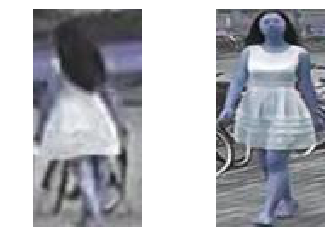

[[0.7755705]]
first pic =  0001_c1s1_002301_00.jpg
second pic =  0001_c1s1_002301_00.jpg
answer is =  1


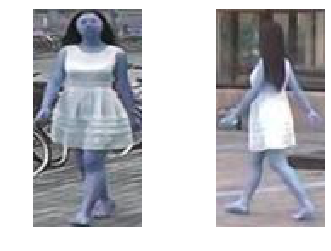

[[0.7292088]]
first pic =  0001_c6s2_112268_00.jpg
second pic =  0001_c6s2_112268_00.jpg
answer is =  1


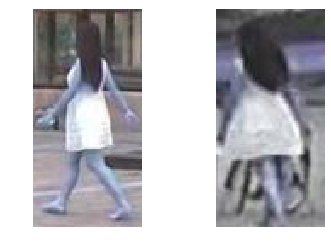

[[0.749439]]
first pic =  0001_c5s1_002526_00.jpg
second pic =  0001_c5s1_002526_00.jpg
answer is =  1


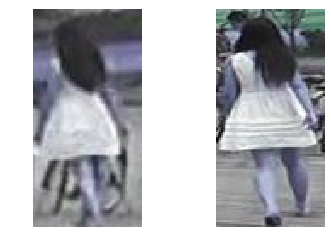

[[0.7046239]]
first pic =  0001_c5s2_119224_00.jpg
second pic =  0001_c5s2_119224_00.jpg
answer is =  1


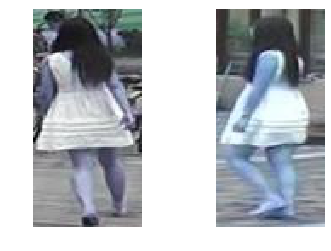

[[0.5126413]]
first pic =  0001_c6s1_009701_00.jpg
second pic =  0001_c6s1_009701_00.jpg
answer is =  0


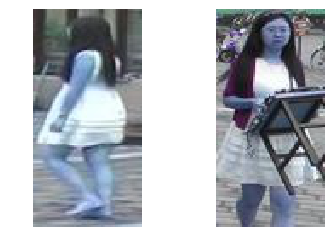

[[0.49326578]]
first pic =  0001_c3s1_083067_00.jpg
second pic =  0001_c3s1_083067_00.jpg
answer is =  0


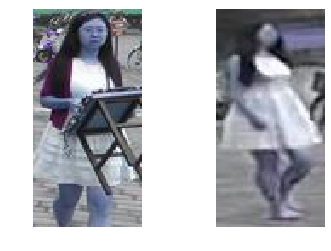

[[0.54916036]]
first pic =  0001_c5s1_009476_00.jpg
second pic =  0001_c5s1_009476_00.jpg
answer is =  0


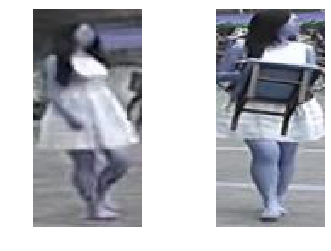

[[0.58250064]]
first pic =  0001_c3s3_026028_00.jpg
second pic =  0001_c3s3_026028_00.jpg
answer is =  0


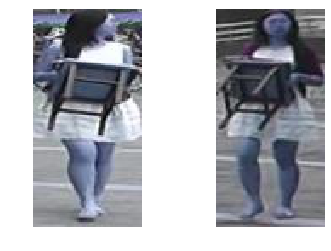

[[0.6387325]]
first pic =  0001_c1s2_037091_00.jpg
second pic =  0001_c1s2_037091_00.jpg
answer is =  0


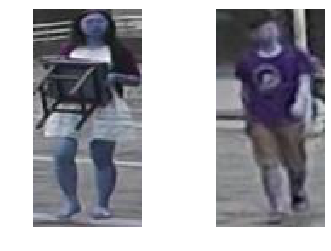

[[0.7163824]]
first pic =  0002_c5s1_000551_00.jpg
second pic =  0002_c5s1_000551_00.jpg
answer is =  1


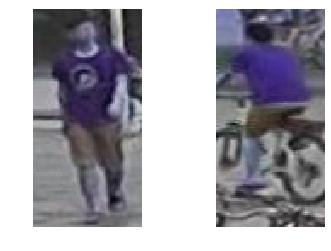

[[0.7404318]]
first pic =  0002_c2s1_000976_00.jpg
second pic =  0002_c2s1_000976_00.jpg
answer is =  1


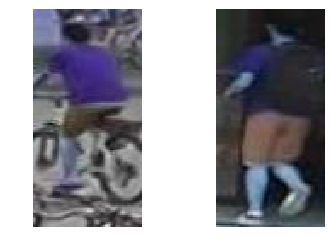

[[0.7598768]]
first pic =  0002_c6s1_069251_00.jpg
second pic =  0002_c6s1_069251_00.jpg
answer is =  1


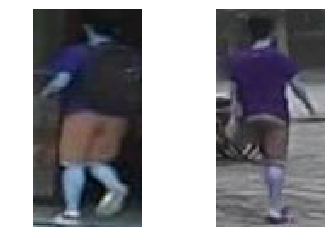

[[0.7598768]]
first pic =  0002_c5s1_000776_00.jpg
second pic =  0002_c5s1_000776_00.jpg
answer is =  1


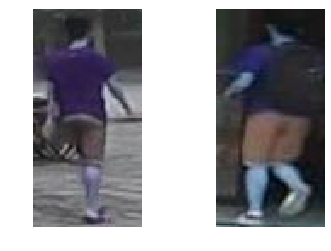

[[0.7100288]]
first pic =  0002_c6s1_069251_00.jpg
second pic =  0002_c6s1_069251_00.jpg
answer is =  1


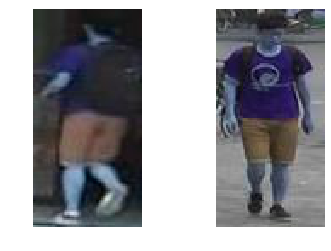

[[0.5359295]]
first pic =  0002_c2s1_068496_00.jpg
second pic =  0002_c2s1_068496_00.jpg
answer is =  0


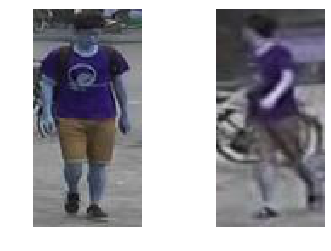

[[0.5251893]]
first pic =  0002_c5s1_000476_00.jpg
second pic =  0002_c5s1_000476_00.jpg
answer is =  0


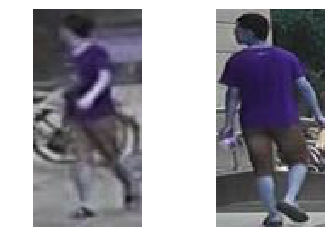

[[0.52465755]]
first pic =  0002_c3s1_136233_00.jpg
second pic =  0002_c3s1_136233_00.jpg
answer is =  0


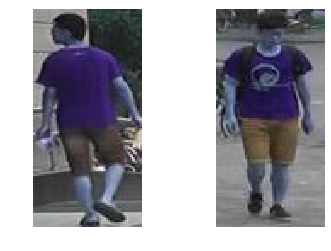

[[0.53971434]]
first pic =  0002_c2s1_068496_00.jpg
second pic =  0002_c2s1_068496_00.jpg
answer is =  0


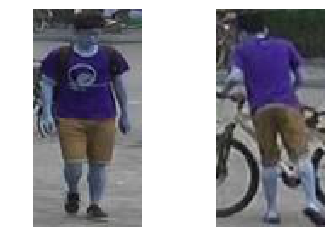

[[0.54189897]]
first pic =  0002_c2s1_000801_00.jpg
second pic =  0002_c2s1_000801_00.jpg
answer is =  0


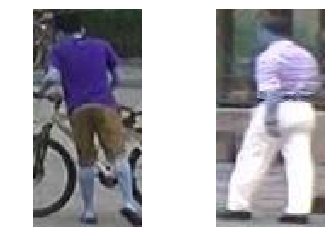

[[0.7880466]]
first pic =  0023_c6s1_002551_00.jpg
second pic =  0023_c6s1_002551_00.jpg
answer is =  1


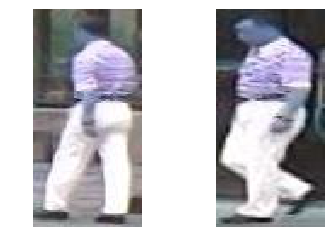

[[0.7644823]]
first pic =  0023_c6s1_002451_00.jpg
second pic =  0023_c6s1_002451_00.jpg
answer is =  1


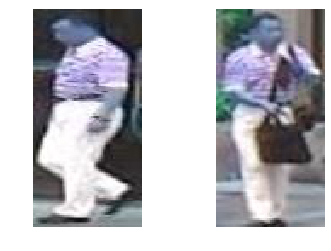

[[0.78967524]]
first pic =  0023_c6s1_003826_00.jpg
second pic =  0023_c6s1_003826_00.jpg
answer is =  1


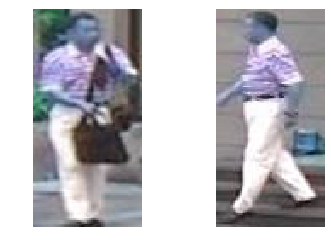

[[0.7698769]]
first pic =  0023_c6s1_002501_00.jpg
second pic =  0023_c6s1_002501_00.jpg
answer is =  1


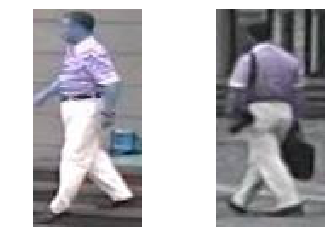

[[0.7499464]]
first pic =  0023_c1s1_004101_00.jpg
second pic =  0023_c1s1_004101_00.jpg
answer is =  1


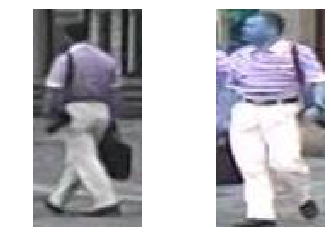

[[0.69702345]]
first pic =  0023_c6s1_003901_00.jpg
second pic =  0023_c6s1_003901_00.jpg
answer is =  0


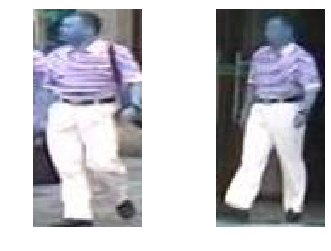

[[0.6899152]]
first pic =  0023_c6s1_002401_00.jpg
second pic =  0023_c6s1_002401_00.jpg
answer is =  0


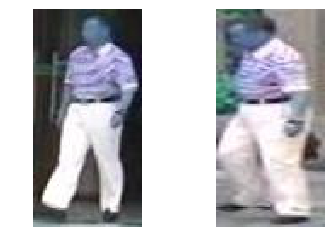

[[0.69453025]]
first pic =  0023_c6s1_002676_00.jpg
second pic =  0023_c6s1_002676_00.jpg
answer is =  0


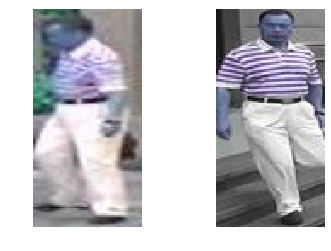

[[0.6674028]]
first pic =  0023_c3s1_001951_00.jpg
second pic =  0023_c3s1_001951_00.jpg
answer is =  0


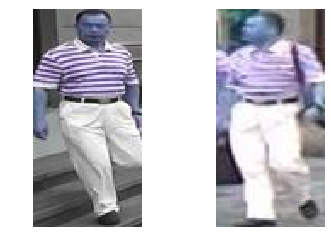

[[0.7162091]]
first pic =  0023_c6s1_003901_00.jpg
second pic =  0023_c6s1_003901_00.jpg
answer is =  0


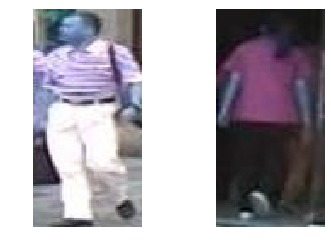

[[0.7432332]]
first pic =  0026_c6s1_002676_00.jpg
second pic =  0026_c6s1_002676_00.jpg
answer is =  1


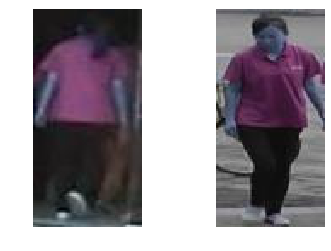

[[0.80741715]]
first pic =  0026_c2s1_001801_00.jpg
second pic =  0026_c2s1_001801_00.jpg
answer is =  1


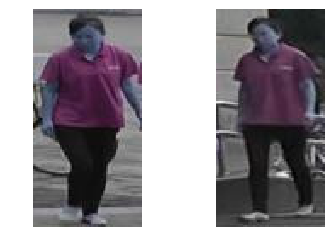

[[0.6642513]]
first pic =  0026_c3s1_002026_00.jpg
second pic =  0026_c3s1_002026_00.jpg
answer is =  1


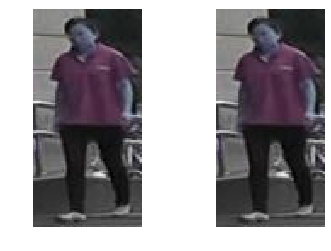

[[0.80741715]]
first pic =  0026_c3s1_002026_00.jpg
second pic =  0026_c3s1_002026_00.jpg
answer is =  1


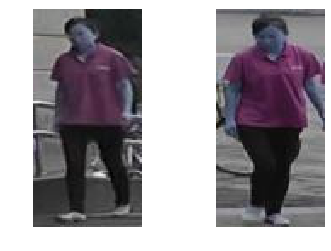

[[0.6642513]]
first pic =  0026_c2s1_001801_00.jpg
second pic =  0026_c2s1_001801_00.jpg
answer is =  1


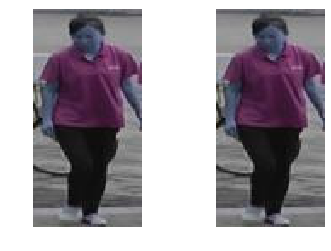

[[0.6354656]]
first pic =  0026_c2s1_001801_00.jpg
second pic =  0026_c2s1_001801_00.jpg
answer is =  0


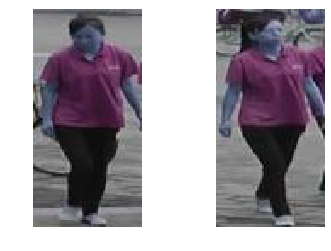

[[0.6466917]]
first pic =  0026_c2s1_001751_00.jpg
second pic =  0026_c2s1_001751_00.jpg
answer is =  0


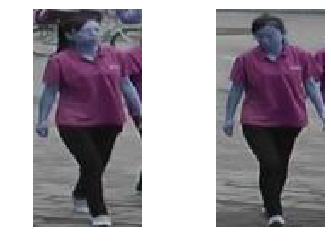

[[0.6642513]]
first pic =  0026_c2s1_001776_00.jpg
second pic =  0026_c2s1_001776_00.jpg
answer is =  0


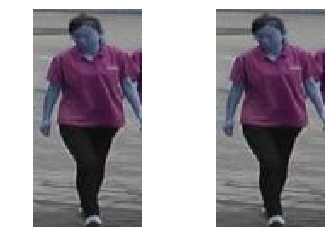

[[0.6503141]]
first pic =  0026_c2s1_001776_00.jpg
second pic =  0026_c2s1_001776_00.jpg
answer is =  0


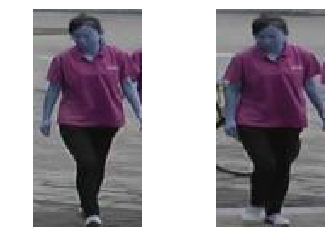

[[0.26302755]]
first pic =  0026_c2s1_001801_00.jpg
second pic =  0026_c2s1_001801_00.jpg
answer is =  0


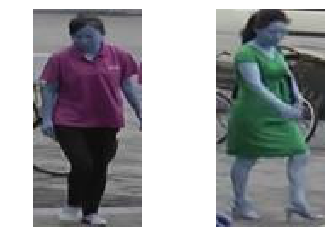

[[0.5961342]]
first pic =  0049_c2s1_004826_00.jpg
second pic =  0049_c2s1_004826_00.jpg
answer is =  1


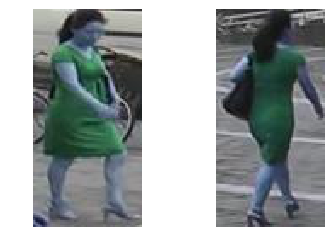

[[0.5542617]]
first pic =  0049_c1s1_005526_00.jpg
second pic =  0049_c1s1_005526_00.jpg
answer is =  1


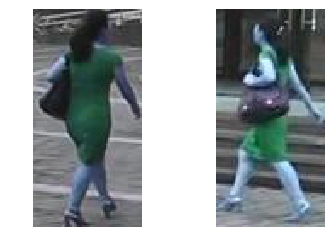

[[0.71528876]]
first pic =  0049_c6s1_005651_00.jpg
second pic =  0049_c6s1_005651_00.jpg
answer is =  1


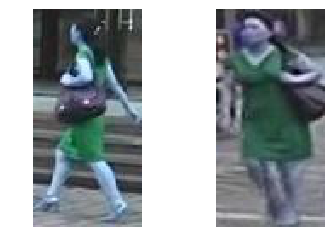

[[0.5836308]]
first pic =  0049_c5s1_005576_00.jpg
second pic =  0049_c5s1_005576_00.jpg
answer is =  1


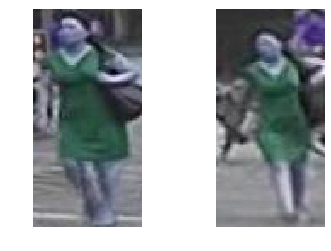

[[0.5421731]]
first pic =  0049_c5s1_005401_00.jpg
second pic =  0049_c5s1_005401_00.jpg
answer is =  1


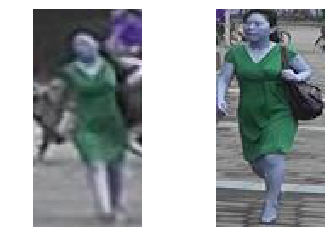

[[0.6881112]]
first pic =  0049_c3s1_005151_00.jpg
second pic =  0049_c3s1_005151_00.jpg
answer is =  0


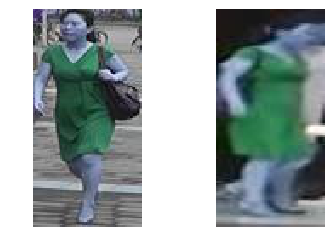

[[0.62301207]]
first pic =  0049_c6s2_110368_00.jpg
second pic =  0049_c6s2_110368_00.jpg
answer is =  0


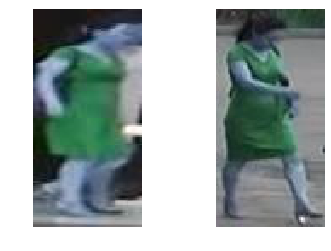

[[0.50089645]]
first pic =  0049_c2s1_004726_00.jpg
second pic =  0049_c2s1_004726_00.jpg
answer is =  0


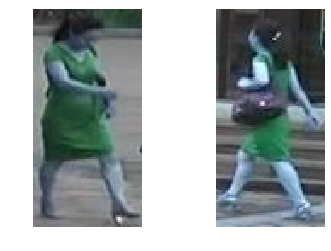

[[0.5086401]]
first pic =  0049_c6s1_005676_00.jpg
second pic =  0049_c6s1_005676_00.jpg
answer is =  0


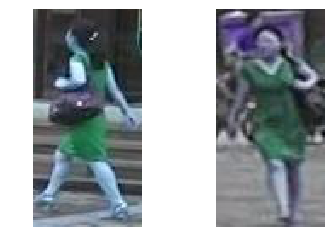

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(len(data1)-1):
    test_data1 = np.empty((1, 128, 64,3))
    test_data2 = np.empty((1, 128, 64,3))
    test_data1[0,:,:,:] = cv2.imread(path_dir+'/'+file_list[data1[i]],cv2.IMREAD_COLOR)
    test_data2[0,:,:,:] = cv2.imread(path_dir+'/'+file_list[data1[i+1]],cv2.IMREAD_COLOR)
    test_data1 = test_data1.reshape(-1,128,64,3)
    test_data2 = test_data2.reshape(-1,128,64,3)
    print(sess.run(tf.nn.sigmoid(model),feed_dict={X1:test_data1,
                                            X2:test_data2,
                                           Y:CoN[i].reshape(-1,1),
                                           keep_prob: 1}))
    img1 = cv2.imread(path_dir+'/'+file_list[data1[i]],cv2.IMREAD_COLOR)
    img2 = cv2.imread(path_dir+'/'+file_list[data1[i+1]],cv2.IMREAD_COLOR)
    fig , ax = plt.subplots(1, 2)
    ax[0].set_axis_off()
    ax[1].set_axis_off()

    ax[0].imshow(img1)
    ax[1].imshow(img2)
    
    print("first pic = ",file_list[data1[i]])
    print("second pic = ",file_list[data1[i]])
    print("answer is = ",CoN[i])
    plt.show()
    plt.close(fig)

In [ ]:
test_data1 = np.empty((1, 128, 64,3))
test_data2 = np.empty((1, 128, 64,3))
i=0
test_data1[0,:,:,:] = cv2.imread('data/3.jpg',cv2.IMREAD_COLOR)
test_data2[0,:,:,:] = cv2.imread('data/4.jpg',cv2.IMREAD_COLOR)
test_data1 = test_data1.reshape(-1,128,64,3)
test_data2 = test_data2.reshape(-1,128,64,3)
print(sess.run(tf.nn.sigmoid(model),feed_dict={X1:test_data1,
                                            X2:test_data2,
                                           keep_prob: 1}))
img1 = cv2.imread('data/3.jpg',cv2.IMREAD_COLOR)
img2 = cv2.imread('data/3.jpg',cv2.IMREAD_COLOR)
fig , ax = plt.subplots(1, 2)
ax[0].set_axis_off()
ax[1].set_axis_off()

ax[0].imshow(img1)
ax[1].imshow(img2)
    
print("first pic = ",file_list[data1[i]])
print("second pic = ",file_list[data2[i]])
print("answer is = ",CoN[i])
plt.show()
plt.close(fig)

In [ ]:
L2_1 = tf.constant([[5, 4, 3],[10,11,12]])
L2_2 = tf.constant([[3, 2, 1],[5,4,3]])
L3 = tf.abs(tf.subtract(L2_1,L2_2))
temp = tf.reduce_sum(L2_2,axis=1,keep_dims=True)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(temp))
sess.close()

In [ ]:
X1 = tf.placeholder(tf.float32, [None, 128, 64, 3])
X2 = tf.placeholder(tf.float32, [None, 128, 64, 3])
Y = tf.placeholder(tf.float32, [None, 2])
keep_prob = tf.placeholder(tf.float32)

#-----------------------------------------------------
W1_1 = tf.Variable(tf.random_normal([3,3,3,32], stddev = 0.01))
L1_1 = tf.nn.conv2d(X1,W1_1,strides=[1,1,1,1],padding='SAME')
L1_1 = tf.nn.relu(L1_1)
L1_1 = tf.nn.max_pool(L1_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')

W2_1 = tf.Variable(tf.random_normal([3,3,32,64], stddev = 0.01))
L2_1 = tf.nn.conv2d(L1_1,W2_1,strides=[1,1,1,1],padding='SAME')
L2_1 = tf.nn.relu(L2_1)
L2_1 = tf.nn.max_pool(L2_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')

W1_2 = tf.Variable(tf.random_normal([3,3,3,32], stddev = 0.01))
L1_2 = tf.nn.conv2d(X2,W1_2,strides=[1,1,1,1],padding='SAME')
L1_2 = tf.nn.relu(L1_2)
L1_2 = tf.nn.max_pool(L1_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')

W2_2 = tf.Variable(tf.random_normal([3,3,32,64], stddev = 0.01))
L2_2 = tf.nn.conv2d(L1_2,W2_2,strides=[1,1,1,1],padding='SAME')
L2_2 = tf.nn.relu(L2_2)
L2_2 = tf.nn.max_pool(L2_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')
#-----------------------------------------------------

W3 = tf.Variable(tf.random_normal([32*16*64*2,256], stddev = 0.01))
L3_1 = tf.reshape(L2_1, [-1,32*16*64])
L3_2 = tf.reshape(L2_2, [-1,32*16*64])
L3 = tf.concat([L3_1, L3_2], 1)
L3 = tf.matmul(L3,W3)
L3 = tf.nn.relu(L3)
L3 = tf.nn.dropout(L3, keep_prob)

W4 = tf.Variable(tf.random_normal([256, 2], stddev = 0.01))
model= tf.matmul(L3,W4)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=model))
# optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)
# optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)
optimizer = tf.train.RMSPropOptimizer(0.001).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size=100
total_batch=int(len(data_index) / batch_size)
print("전체 데이터 크기는",len(data_index),"배치 크기는",batch_size,"전체 배치는",total_batch)

for epoch in range(1):
    total_cost=0
    index_num=0
    for i in range(total_batch):
        
        #batch_xs1 = data1[i*batch_size : (i+1)*batch_size]
        #batch_xs1 = batch_xs1.reshape(-1,128,64,1)
        #batch_xs2 = data2[i*batch_size : (i+1)*batch_size]
        #batch_xs2 = batch_xs2.reshape(-1,128,64,1)
        input_data1 = np.empty((batch_size, 128, 64, 3))
        input_data2 = np.empty((batch_size, 128, 64, 3))
        batch_i=0
        for index_num in data_index[i*batch_size:(i+1)*batch_size]:
            input_data1[batch_i,:,:] = cv2.imread(path_dir+'/'+file_list[data1[index_num]],cv2.IMREAD_COLOR)
            input_data2[batch_i,:,:] = cv2.imread(path_dir+'/'+file_list[data2[index_num]],cv2.IMREAD_COLOR)
            batch_i=batch_i+1
        batch_xs1 = input_data1
        batch_xs1 = batch_xs1.reshape(-1,128,64,3)
        batch_xs2 = input_data2
        batch_xs2 = batch_xs2.reshape(-1,128,64,3)
        batch_ys = CoN[i*batch_size : (i+1)*batch_size]
        #print(batch_ys.shape)
        #batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        #batch_xs = batch_xs.reshape(-1,28,28,1)
        
        _, cost_val=sess.run([optimizer, cost], feed_dict={X1:batch_xs1, X2:batch_xs2, Y:batch_ys, keep_prob:0.7})
        total_cost += cost_val
    print('Epoch:', '%04d' % (epoch + 1), 'Avg.cost=', '{:.3f}'.format(total_cost / total_batch))
    
print('Optimized!')

is_correct=tf.equal(tf.argmax(model,1),tf.argmax(Y,1))
accuracy=tf.reduce_mean(tf.cast(is_correct, tf.float32))
test_data1 = np.empty((1000, 128, 64,3))
test_data2 = np.empty((1000, 128, 64,3))
for i in range(1000):
    test_data1[i,:,:] = cv2.imread(path_dir+'/'+file_list[data1[i]],cv2.IMREAD_COLOR)
    test_data2[i,:,:] = cv2.imread(path_dir+'/'+file_list[data2[i]],cv2.IMREAD_COLOR)

test_data1 = test_data1.reshape(-1,128,64,3)
test_data2 = test_data2.reshape(-1,128,64,3)
print('정확도:', sess.run(accuracy, feed_dict={X1:test_data1,
                                            X2:test_data2,
                                           Y:CoN[data_index[:1000]],
                                           keep_prob: 1}))


In [ ]:
test_data1.shape

In [ ]:
test_data1.shape

In [ ]:
sess.close()

In [ ]:
np.save('/home/esdl/다운로드/data1', data1)
np.save('/home/esdl/다운로드/data2', data2)
np.save('/home/esdl/다운로드/CoN', CoN)

In [ ]:
X1 = tf.placeholder(tf.float32, [None, 128, 64, 1])
X2 = tf.placeholder(tf.float32, [None, 128, 64, 1])
Y = tf.placeholder(tf.float32, [None, 2])
keep_prob = tf.placeholder(tf.float32)

#-----------------------------------------------------
W1_1 = tf.Variable(tf.random_normal([3,3,1,32], stddev = 0.01))
L1_1 = tf.nn.conv2d(X1,W1_1,strides=[1,1,1,1],padding='SAME')
L1_1 = tf.nn.relu(L1_1)
L1_1 = tf.nn.max_pool(L1_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')

W2_1 = tf.Variable(tf.random_normal([3,3,32,64], stddev = 0.01))
L2_1 = tf.nn.conv2d(L1_1,W2_1,strides=[1,1,1,1],padding='SAME')
L2_1 = tf.nn.relu(L2_1)
L2_1 = tf.nn.max_pool(L2_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')

W1_2 = tf.Variable(tf.random_normal([3,3,1,32], stddev = 0.01))
L1_2 = tf.nn.conv2d(X2,W1_2,strides=[1,1,1,1],padding='SAME')
L1_2 = tf.nn.relu(L1_2)
L1_2 = tf.nn.max_pool(L1_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')

W2_2 = tf.Variable(tf.random_normal([3,3,32,64], stddev = 0.01))
L2_2 = tf.nn.conv2d(L1_2,W2_2,strides=[1,1,1,1],padding='SAME')
L2_2 = tf.nn.relu(L2_2)
L2_2 = tf.nn.max_pool(L2_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')
#-----------------------------------------------------

W3 = tf.Variable(tf.random_normal([32*16*64*2,256], stddev = 0.01))
L3_1 = tf.reshape(L2_1, [-1,32*16*64])
L3_2 = tf.reshape(L2_2, [-1,32*16*64])
L3 = tf.concat([L3_1, L3_2], 1)
L3 = tf.matmul(L3,W3)
L3 = tf.nn.relu(L3)
L3 = tf.nn.dropout(L3, keep_prob)

W4 = tf.Variable(tf.random_normal([256, 2], stddev = 0.01))
model= tf.matmul(L3,W4)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=model))
# optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)
# optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)
optimizer = tf.train.RMSPropOptimizer(0.001).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size=100
total_batch=int((len(file_list)/2) / batch_size)

for epoch in range(15):
    total_cost=0
    for i in range(total_batch):
        
        #batch_xs1 = data1[i*batch_size : (i+1)*batch_size]
        #batch_xs1 = batch_xs1.reshape(-1,128,64,1)
        #batch_xs2 = data2[i*batch_size : (i+1)*batch_size]
        #batch_xs2 = batch_xs2.reshape(-1,128,64,1)
        data = np.empty((batch_size*2, 128, 64))
        batch_i=0
        for img_name in file_list[batch_i*batch_size*2:(batch_i+1)*batch_size*2]:
            data[batch_i,:,:] = cv2.imread(path_dir+'/'+img_name,cv2.IMREAD_GRAYSCALE)
            batch_i=batch_i+1
        batch_xs1 = data[0::2]
        batch_xs1 = batch_xs1.reshape(-1,128,64,1)
        batch_xs2 = data[1::2]
        batch_xs2 = batch_xs2.reshape(-1,128,64,1)
        batch_ys = CoN[i*batch_size : (i+1)*batch_size]
        print(batch_xs1.shape,batch_xs2.shape,batch_ys.shape)
        #batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        #batch_xs = batch_xs.reshape(-1,28,28,1)
        
        _, cost_val=sess.run([optimizer, cost], feed_dict={X1:batch_xs1, X2:batch_xs2, Y:batch_ys, keep_prob:0.7})
        total_cost += cost_val
    print('Epoch:', '%04d' % (epoch + 1), 'Avg.cost=', '{:.3f}'.format(total_cost / total_batch))
    
print('Optimized!')

#is_correct=tf.equal(tf.argmax(model,1),tf.argmax(Y,1))
#accuracy=tf.reduce_mean(tf.cast(is_correct, tf.float32))
#print('정확도:', sess.run(accuracy, feed_dict={X:mnist.test.images.reshape(-1,28,28,1),
#                                           Y:mnist.test.labels,
#                                           keep_prob: 1}))
sess.close()

In [ ]:
X1 = tf.placeholder(tf.float32, [None, 128, 64, 1])
X2 = tf.placeholder(tf.float32, [None, 128, 64, 1])
Y = tf.placeholder(tf.float32, [None, 2])
keep_prob = tf.placeholder(tf.float32)

#-----------------------------------------------------
W1_1 = tf.Variable(tf.random_normal([3,3,1,16], stddev = 0.01))
L1_1 = tf.nn.conv2d(X1,W1_1,strides=[1,1,1,1],padding='SAME')
L1_1 = tf.nn.relu(L1_1)
L1_1 = tf.nn.max_pool(L1_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')

W2_1 = tf.Variable(tf.random_normal([3,3,16,32], stddev = 0.01))
L2_1 = tf.nn.conv2d(L1_1,W2_1,strides=[1,1,1,1],padding='SAME')
L2_1 = tf.nn.relu(L2_1)
L2_1 = tf.nn.max_pool(L2_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')


"""
W1_2 = tf.Variable(tf.random_normal([3,3,1,32], stddev = 0.01))
L1_2 = tf.nn.conv2d(X2,W1_2,strides=[1,1,1,1],padding='SAME')
L1_2 = tf.nn.relu(L1_2)
L1_2 = tf.nn.max_pool(L1_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')

W2_2 = tf.Variable(tf.random_normal([3,3,32,64], stddev = 0.01))
L2_2 = tf.nn.conv2d(L1_2,W2_2,strides=[1,1,1,1],padding='SAME')
L2_2 = tf.nn.relu(L2_2)
L2_2 = tf.nn.max_pool(L2_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'SAME')

"""
#-----------------------------------------------------

#W3 = tf.Variable(tf.random_normal([32*16*64*2,256], stddev = 0.01))
W3 = tf.Variable(tf.random_normal([32*16*32,256], stddev = 0.01))
L3_1 = tf.reshape(L2_1, [-1,32*16*32])
#L3_2 = tf.reshape(L2_2, [-1,32*16*64])
#L3 = tf.concat([L3_1, L3_2], 1)
L3 = tf.matmul(L3_1,W3)
L3 = tf.nn.relu(L3)
L3 = tf.nn.dropout(L3, keep_prob)

W4 = tf.Variable(tf.random_normal([256, 2], stddev = 0.01))
model= tf.matmul(L3,W4)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=model))
# optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)
# optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)
optimizer = tf.train.RMSPropOptimizer(0.001).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size=1
total_batch=int((len(file_list)/2) / batch_size)
print("되니????")
for epoch in range(15):
    total_cost=0
    for i in range(total_batch):
        
        #batch_xs1 = data1[i*batch_size : (i+1)*batch_size]
        #batch_xs1 = batch_xs1.reshape(-1,128,64,1)
        #batch_xs2 = data2[i*batch_size : (i+1)*batch_size]
        #batch_xs2 = batch_xs2.reshape(-1,128,64,1)
        data = np.empty((batch_size*2, 128, 64))
        batch_i=0
        for img_name in file_list[batch_i*batch_size*2:(batch_i+1)*batch_size*2]:
            data[batch_i,:,:] = cv2.imread(path_dir+'/'+img_name,cv2.IMREAD_GRAYSCALE)
            batch_i=batch_i+1
        batch_xs1 = data[0::2]
        batch_xs1 = batch_xs1.reshape(-1,128,64,1)
        batch_xs2 = data[1::2]
        batch_xs2 = batch_xs2.reshape(-1,128,64,1)
        batch_ys = CoN[i*batch_size : (i+1)*batch_size]
        print(batch_xs1.shape,batch_xs2.shape,batch_ys.shape)
        #batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        #batch_xs = batch_xs.reshape(-1,28,28,1)
        print("되니?")
        _, cost_val=sess.run([optimizer, cost], feed_dict={X1:batch_xs1#, X2:batch_xs2
                                                           , Y:batch_ys, keep_prob:0.7})
        print("되니!")
        total_cost += cost_val
    print('Epoch:', '%04d' % (epoch + 1), 'Avg.cost=', '{:.3f}'.format(total_cost / total_batch))
    
print('Optimized!')

#is_correct=tf.equal(tf.argmax(model,1),tf.argmax(Y,1))
#accuracy=tf.reduce_mean(tf.cast(is_correct, tf.float32))
#print('정확도:', sess.run(accuracy, feed_dict={X:mnist.test.images.reshape(-1,28,28,1),
#                                           Y:mnist.test.labels,
#                                           keep_prob: 1}))
sess.close()